In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [75]:
import os
DATA_PATH = "Dane\Wlasne\stock_data_with_news.csv"

In [76]:
data = pd.read_csv(DATA_PATH, sep=",")

In [77]:
data.head()

,Date,Increased,News_no1,News_no2,News_no3,News_no4,News_no5,News_no6,News_no7,News_no8,...,News_no11,News_no12,News_no13,News_no14,News_no15,News_no16,News_no17,News_no18,News_no19,News_no20
0,2012-03-01,1,Lowball Salary Offer? Here Are 10 Ways to Brid...,Your Finances Are Killing Your Sex Life,Surprising Investing Myths,Taxes 2011: Five Things You Might Not Expect T...,Five Ways Women Entrepreneurs Can Get a Financ...,"For Richer, Not Poorer: Five Ways to Manage Mo...",Tax Strategies in a Tough Economy,Debt Collectors Targeted For Heightened Unlawf...,...,Facebook Eyed By Banks For Preferred Customer ...,JPMorgan Chase Argues Bank Accounts Are Like N...,Let's Not Forget About George...,Your Start-Up Life: Advice From a CNN Anchor o...,Credit Card Applications: Applying For My Firs...,Gas Prices: What You Are Paying At The Pump [P...,Eight Ways Money Managers Can Be 'HOT': Honest...,My Kids Will Cost Me Close to a Million Dollar...,The Importance of a Savings Account,Obama's Budget Proposal: Six Lessons for Your ...
1,2012-11-23,1,Target Black Friday Deals 2012 Revealed (PHOTOS),Black Friday Online Deals 2012: Amazon Reveals...,Walmart Black Friday Deals 2012: Your Guide Fo...,Best Buy Black Friday 2012 Deals: Your Shoppin...,Best Buy Black Friday Store Hours 2012,Black Friday 2012 (LIVE UPDATES),"Black Friday Ads 2012: Deals From Walmart, Bes...",Walmart Black Friday Store Hours 2012: Opening...,...,10 Ways To Give Back On Black Friday,Giving Back for Literacy and a Better World,From Kara2Mijael: The Gift of Giving,"BlockFriday -- A Collective, Positive Response...",'Sandy Friday' Urges Businesses To Pledge 10% ...,"Walmart Strike Hits 100 Cities, But Fails To D...",Walmart Says It Has Best Black Friday Ever Des...,What Kind of Walmart Do We Want for Our Country?,Walmart Strikers Prepare For Black Friday Prot...,Walmart Protesters Tweet Pictures Of Black Fri...
2,2012-12-24,0,Top 2012 Highlights in Maternal Health,"Fighting Bulldozers, Slum Dwellers Find a New ...",How New York City Food Trucks Helped Heal Hurr...,A Wonderful Life? Finding Capra in Today's Chr...,5 Online Twists to Traditional Holiday Giving,Making a Shopping List With Impact in Mind,The Wal-Martyrs of Mexican Bribery,Reflections for Improving Work Relationships i...,...,What Stores Are Open On Christmas?,Stores Open On Christmas Day 2012,Kill the 'Fiscal Cliff' Instead of the Economy,The States Doling Out the Best (And Worst) Ben...,Startup Summer: A Pioneering Youth Entrepreneu...,Is It Time to Make a Bold Move?,A Christmas Carol for Bankers,Soledad Corona Gets Help From Occupy L.A. To R...,Wealthy Greek Tax Dodgers Escaping Crackdown: ...,Paul Krugman: Fiscal Crisis Prophets Are Membe...
3,2013-07-05,1,I Love It!: 20 Questions for Women in Construc...,The Global Search for Education: Student Loan ...,Remembering Back,Interview With Ethos Water Founder Peter Thum ...,Hostess To Start Freezing Some Twinkies Before...,"Nestle, Danone Both Possibly Price-Fixed Infan...",11 Common Interview Questions That Are Actuall...,Bed Bath And Beyond Fire Caught On Tape By Cus...,...,3 Steps to Creating the Company Culture You Want,KFC Threatens Legal Action Against 'Hitler' Ch...,"QE3 Works, So Please Don't Mess With It!",10 States Where People Drink The Most Beer,Paul Krugman: Here's 1 Thing That Hasn't Chang...,How to Prepare for Any Disaster,"Unemployment Rate Unchanged In June, Long-Term...","June Jobs Report: U.S. Economy Adds 195,000 Jo...","Night Parrot, Nocturnal Bird In Australia, See...",Last Stop -- The Grand Canyon
4,2013-11-29,0,This Photo Proves Black Friday Isn't Worth The...,The Scene Inside The Macy's Flagship On Thanks...,"The United States Of America, In 3 Tweets",Walmart's Black Friday Going About As Badly As...,Walmart Wage Protest Leads To Arrest Of Man Dr...,Best Black Friday TV Deals,Black Friday May Not Be Shopping Boon Retailer...,Black Friday Marred By Violence In Several States,...,Hollywood Must Protect Animals,Missouri Gas Pipeline Explodes

# Dzielenie na train/test

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Date', 'Increased'], axis=1), data['Increased'], test_size=0.20, random_state=42)

In [79]:
X_train.shape

(785, 20)

In [80]:
X_test.shape

(197, 20)

In [81]:
y_train.shape

(785,)

In [82]:
X_train.head()

,News_no1,News_no2,News_no3,News_no4,News_no5,News_no6,News_no7,News_no8,News_no9,News_no10,News_no11,News_no12,News_no13,News_no14,News_no15,News_no16,News_no17,News_no18,News_no19,News_no20
536,Donald Trump Thanks Paul Ryan For His Continue...,HUFFPOST HILL - Turns Out Somebody Actually Do...,Delaware Supreme Court Declares State's Death ...,Tuesday's Morning Email: Trump Faces Growing F...,Hillary Clinton Got A Big Fundraising Boost Fr...,"Never, Ever Report A Poll You Haven’t Seen",Federal Judge Blocks North Dakota Voter ID Law,HuffPost Rise: What You Need To Know On August 2,Public Defender Who Was Handcuffed In Court Ha...,Bill Bratton Resigning As NYPD Commissioner,Trump University Lawsuit Advances As Judge Cur...,Why This Father Feeds His Son Freakish Fruit A...,"No, Voters Aren't Secretly Pining For Donald T...",How The Khans Became A Weeklong Story: An Expl...,Donald Trump Doesn't Seem To Know The Meaning ...,Ex-Trump Staffer Accused Of Assaulting Reporte...,HUFFPOLLSTER: Polls Continue To Show Good News...,How Third Party Voters And Non-Voters Could Sh...,Why Is Hillary Clinton Letting Donald Trump Ba...,Donald Trump Says He Loves Babies Moments Befo...
333,See If Your Next-Door Neighbor Is A Toxic Dump,"HuffPost Rise Morning Newsbrief, October 9",You Can Now Listen To Justice Scalia Call Obam...,Wooing Chairman Ryan: Paul Ryan Remains On Sid...,Arkansas Judge Halts Executions As Inmates Cha...,HUFFPOLLSTER: Gallup Bows Out Of Primary Polling,Obama Administration Disowns Pentagon’s $500 M...,Chris Christie Doesn't Care About All This Hou...,Why The House Speaker Scramble May Imperil Rep...,Obama Visits Oregon One Week After Mass Shooting,Desperate GOP Begs Paul Ryan To Save Them All,Climate Change Haunts This Year's Pumpkin Crop,Regulators Open Second Investigation Into VW E...,A New Clue Suggests Biden May Run,Key Progressive Group To Be Absorbed By Wellst...,Court Places Hold On Clean Water Rule Nationwide,One Reason Paul Ryan Is Reluctant To Run For H...,Obama: Backing Away From Immigration Reform Is...,The Small Brooklyn Publisher That Brought The ...,Bernie Sanders' New Digital Whiz Comes From A ...
887,Democrats Claim Victory After Yet Another Trum...,We Must Emphasize Reading For The Sake Of Our ...,What Trump Should Say About Mueller,Senate Paid Out $1.45 Million In Discriminatio...,Social Commerce Takes Hold,State Department Told Some Refugee Offices The...,A Tale Of Two Americas: GOP Gushes While A Gro...,Texas Attorney General Says It's Fine To Carry...,Tweeters Refuse To Let Donald Trump Take Credi...,Ivanka Trump Goofs Up On Tax Law In Her Televi...,"U.S. Ambassador Denies Anti-Muslim Comments, T...",Former U.S. Attorneys Warn Trump About 'Severe...,Second Federal Judge Blocks Trump's Rollback O...,Needed: A Meter For Trump’s Lies-Per-Minute (LPM),"Republicans Win, America Loses",I Am Tired Of The Hypocrisy,Newly Reelected New York City Mayor Decides Hi...,Assessing The Real Impact Of Doug Jones’ Elect...,"Franken, Unchained: Post-Resignation, He Is Tr...",Trump Throws Support Behind Ron DeSantis For F...
528,HUFFPOST HILL - Media To Cover Donald Trump Sp...,Mike Pence Makes The Best Of A Pretty Awkward ...,Ted Cruz Said Alton Sterling's Name At The Rep...,This Year's Primary Left Most Voters With A Lo...,Republicans Flip Out After Cruz Refuses To End...,Trump Adviser Hints Trump May Back Primary Cha...,Chris Christie Slams Ted Cruz's Speech As 'Sel...,Corporations Less Prominent At Donald Trump's ...,HuffPost Rise: What You Need To Know On July 21,Thursday's Morning Email: Cruz Refuses To Endo...,Mike Pence's RNC Speech Gives Voters What They...,Donald Trump's Fundraising Cut Hillary Clinton...,"For RNC Attendees, Putting Clinton In Prison P...","Ted Cruz Praises GOP Push For Civil Rights, Ig...",The GOP Convention Logo Looks A Lot Like The O...,Scott Walker Doesn't Repeat The 'Lock Her Up' ...,The ‘Pledge’ That Saddled Republicans With Trump,This Cannot Be The Convention That Donald Trum...,A Look Bac

# Przetwarzanie newsów (Count Vectorizer)

In [83]:
trainheadlines = []
for row in range(0,len(X_train.index)):
    trainheadlines.append(' '.join(str(x) for x in X_train.iloc[row]))

In [84]:
trainheadlines[0]

"Donald Trump Thanks Paul Ryan For His Continued Support By Tweeting About His Primary Challenger HUFFPOST HILL - Turns Out Somebody Actually Does Put Baby In A Corner Delaware Supreme Court Declares State's Death Penalty Scheme Unconstitutional Tuesday's Morning Email: Trump Faces Growing Firestorm Over Fight With Fallen Soldier's Family Hillary Clinton Got A Big Fundraising Boost From The Democratic Convention Never, Ever Report A Poll You Haven’t Seen Federal Judge Blocks North Dakota Voter ID Law HuffPost Rise: What You Need To Know On August 2 Public Defender Who Was Handcuffed In Court Has Contempt Order Overturned Bill Bratton Resigning As NYPD Commissioner Trump University Lawsuit Advances As Judge Curiel Deals Blow To Donald Why This Father Feeds His Son Freakish Fruit And Vegetables No, Voters Aren't Secretly Pining For Donald Trump How The Khans Became A Weeklong Story: An Explainer For Howard Kurtz Donald Trump Doesn't Seem To Know The Meaning Of Sacrifice Ex-Trump Staffer 

Usuwamy słowa najczęściej występujące a nic nieznaczące

Tura pierwsza (słowa często występujące lecz nie mające żandego realnego znaczenia)

In [85]:
useless_words = [
    ' to ', 
    ' you ', 
    ' the ', 
    ' and ', 
    ' are ', 
    ' is ', 
    ' what ', 
    ' we ', 
    ' where ', 
    ' when ', 
    ' from ', 
    ' at ', 
    ' a ', 
    ' or ', 
    ' for ',
    ' i ',
    ' an '
    # possibly important
#     ' in ',
#     ' of ',
#     ' on ',
#     ' with ',
#     ' his ',
#     ' it '
]

Druga tura oczyszczania nieznaczących słów (apostrofy)

In [86]:
useless_words_p2 = [
    "'s ",
    "'t ",
    "'re "
]

Trzecia tura oczyszczania nieznaczących słów (znaki specjalne)

In [87]:
useless_words_p3 = [
    ':',
    "'",
    ',',
    "(",
    ")",
    '!',
    '?',
    '.',
    '`',
    '‘',
    '’'
]

Czwarta tura oczyszczania nieznaczących słów (cyfry)

In [88]:
useless_words_p4 = [
    '1',
    '2',
    '3',
    '4',
    '5',
    '6',
    '7',
    '8',
    '9',
    '0'
]

Piąta tura (dni tygodnia)?

In [89]:
useless_words_p5 = [
    ' monday ',
    ' tuesday ',
    ' wednesday ',
    ' thursday ',
    ' friday ',
    ' saturday ',
    ' sunday '
]

Szósta tura (nazwy miesięcy)

In [90]:
useless_words_p6 = [
    ' january ',
    ' february ',
    ' march ',
    ' april ',
    ' may ',
    ' june ',
    ' july ',
    ' august ',
    ' september ',
    ' october ',
    ' november ', 
    ' december '
]

Najpierw jednak znormalizujmy tekst do malych liter

In [91]:
trainheadlines = [hdline.lower() for hdline in trainheadlines]

In [92]:
trainheadlines[3]

"huffpost hill - media to cover donald trump speech mike pence makes the best of a pretty awkward situation at the gop convention ted cruz said alton sterling's name at the republican national convention this year's primary left most voters with a lower opinion of the gop republicans flip out after cruz refuses to endorse trump trump adviser hints trump may back primary challenger to cruz in '18 chris christie slams ted cruz's speech as 'selfish' corporations less prominent at donald trump's republican national convention huffpost rise: what you need to know on july 21 thursday's morning email: cruz refuses to endorse trump at rnc mike pence's rnc speech gives voters what they want to hear donald trump's fundraising cut hillary clinton's money advantage in half in june for rnc attendees, putting clinton in prison proves easier said than done ted cruz praises gop push for civil rights, ignoring how his party has trampled them the gop convention logo looks a lot like the one from woodsto

Teraz usunmy slowa

**TURA 1**

In [93]:
for to_remove in useless_words:
    trainheadlines = [hdline.replace(to_remove, ' ') for hdline in trainheadlines]

In [94]:
trainheadlines[3]

"huffpost hill - media cover donald trump speech mike pence makes best of pretty awkward situation gop convention ted cruz said alton sterling's name republican national convention this year's primary left most voters with lower opinion of gop republicans flip out after cruz refuses endorse trump trump adviser hints trump may back primary challenger cruz in '18 chris christie slams ted cruz's speech as 'selfish' corporations less prominent donald trump's republican national convention huffpost rise: need know on july 21 thursday's morning email: cruz refuses endorse trump rnc mike pence's rnc speech gives voters they want hear donald trump's fundraising cut hillary clinton's money advantage in half in june rnc attendees, putting clinton in prison proves easier said than done ted cruz praises gop push civil rights, ignoring how his party has trampled them gop convention logo looks lot like one woodstock scott walker doesn't repeat 'lock her up' taunt, but he comes close ‘pledge’ that sa

**TURA 2**

In [95]:
for to_remove in useless_words_p2:
    trainheadlines = [hdline.replace(to_remove, ' ') for hdline in trainheadlines]

In [96]:
trainheadlines[3]

"huffpost hill - media cover donald trump speech mike pence makes best of pretty awkward situation gop convention ted cruz said alton sterling name republican national convention this year primary left most voters with lower opinion of gop republicans flip out after cruz refuses endorse trump trump adviser hints trump may back primary challenger cruz in '18 chris christie slams ted cruz speech as 'selfish' corporations less prominent donald trump republican national convention huffpost rise: need know on july 21 thursday morning email: cruz refuses endorse trump rnc mike pence rnc speech gives voters they want hear donald trump fundraising cut hillary clinton money advantage in half in june rnc attendees, putting clinton in prison proves easier said than done ted cruz praises gop push civil rights, ignoring how his party has trampled them gop convention logo looks lot like one woodstock scott walker doesn repeat 'lock her up' taunt, but he comes close ‘pledge’ that saddled republicans 

**TURA 3**

In [97]:
for to_remove in useless_words_p3:
    trainheadlines = [hdline.replace(to_remove, '') for hdline in trainheadlines]

In [98]:
trainheadlines[3]

'huffpost hill - media cover donald trump speech mike pence makes best of pretty awkward situation gop convention ted cruz said alton sterling name republican national convention this year primary left most voters with lower opinion of gop republicans flip out after cruz refuses endorse trump trump adviser hints trump may back primary challenger cruz in 18 chris christie slams ted cruz speech as selfish corporations less prominent donald trump republican national convention huffpost rise need know on july 21 thursday morning email cruz refuses endorse trump rnc mike pence rnc speech gives voters they want hear donald trump fundraising cut hillary clinton money advantage in half in june rnc attendees putting clinton in prison proves easier said than done ted cruz praises gop push civil rights ignoring how his party has trampled them gop convention logo looks lot like one woodstock scott walker doesn repeat lock her up taunt but he comes close pledge that saddled republicans with trump t

**TURA 4**

In [99]:
for to_remove in useless_words_p4:
    trainheadlines = [hdline.replace(to_remove, '') for hdline in trainheadlines]

In [100]:
trainheadlines[3]

'huffpost hill - media cover donald trump speech mike pence makes best of pretty awkward situation gop convention ted cruz said alton sterling name republican national convention this year primary left most voters with lower opinion of gop republicans flip out after cruz refuses endorse trump trump adviser hints trump may back primary challenger cruz in  chris christie slams ted cruz speech as selfish corporations less prominent donald trump republican national convention huffpost rise need know on july  thursday morning email cruz refuses endorse trump rnc mike pence rnc speech gives voters they want hear donald trump fundraising cut hillary clinton money advantage in half in june rnc attendees putting clinton in prison proves easier said than done ted cruz praises gop push civil rights ignoring how his party has trampled them gop convention logo looks lot like one woodstock scott walker doesn repeat lock her up taunt but he comes close pledge that saddled republicans with trump this 

**TURA 5**

In [101]:
for to_remove in useless_words_p5:
    trainheadlines = [hdline.replace(to_remove, '') for hdline in trainheadlines]

In [102]:
trainheadlines[3]

'huffpost hill - media cover donald trump speech mike pence makes best of pretty awkward situation gop convention ted cruz said alton sterling name republican national convention this year primary left most voters with lower opinion of gop republicans flip out after cruz refuses endorse trump trump adviser hints trump may back primary challenger cruz in  chris christie slams ted cruz speech as selfish corporations less prominent donald trump republican national convention huffpost rise need know on july morning email cruz refuses endorse trump rnc mike pence rnc speech gives voters they want hear donald trump fundraising cut hillary clinton money advantage in half in june rnc attendees putting clinton in prison proves easier said than done ted cruz praises gop push civil rights ignoring how his party has trampled them gop convention logo looks lot like one woodstock scott walker doesn repeat lock her up taunt but he comes close pledge that saddled republicans with trump this cannot be 

**TURA 6**

In [103]:
for to_remove in useless_words_p6:
    trainheadlines = [hdline.replace(to_remove, '') for hdline in trainheadlines]

**Przykładowe newsy po oczyszczeniu z nieznaczących znaków i wyrazów**

In [104]:
trainheadlines[3]

'huffpost hill - media cover donald trump speech mike pence makes best of pretty awkward situation gop convention ted cruz said alton sterling name republican national convention this year primary left most voters with lower opinion of gop republicans flip out after cruz refuses endorse trump trump adviser hints trumpback primary challenger cruz in  chris christie slams ted cruz speech as selfish corporations less prominent donald trump republican national convention huffpost rise need know onmorning email cruz refuses endorse trump rnc mike pence rnc speech gives voters they want hear donald trump fundraising cut hillary clinton money advantage in half inrnc attendees putting clinton in prison proves easier said than done ted cruz praises gop push civil rights ignoring how his party has trampled them gop convention logo looks lot like one woodstock scott walker doesn repeat lock her up taunt but he comes close pledge that saddled republicans with trump this cannot be convention that d

# Dzielenie fraz

In [105]:
from sklearn.feature_extraction.text import CountVectorizer

In [106]:
countvectorizer = CountVectorizer(ngram_range=(2,2))
train_words = countvectorizer.fit_transform(trainheadlines)
print(train_words.shape)

(785, 98448)


In [107]:
X_train.shape

(785, 20)

# Analiza wyrazów

In [108]:
X_train_count = train_words.toarray()

In [109]:
X_train_count = pd.DataFrame(data=X_train_count,columns = countvectorizer.get_feature_names())

In [110]:
X_train_count.head()

,_ツ_ new,_ツ_ republican,aapi communities,aaron persky,aaron schock,aarp health,aarp withdraw,aasia bibi,ab inbev,abandon everest,...,zuckerberg testimony,zuckerberg tried,zuckerberg trump,zuckerberg venture,zuckerberg watch,zuckerberg your,zuniga should,zyberk ceo,étienne extreme,ᵒᴥᵒᶅ lights
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
X_train_count.sum(axis=0)

_ツ_ new             1
_ツ_ republican      1
aapi communities    1
aaron persky        2
aaron schock        1
                   ..
zuckerberg your     1
zuniga should       1
zyberk ceo          1
étienne extreme     1
ᵒᴥᵒᶅ lights         1
Length: 98448, dtype: int64

In [112]:
words_appearence = pd.DataFrame(X_train_count.sum(axis=0))

In [113]:
words_appearence

,0
_ツ_ new,1
_ツ_ republican,1
aapi communities,1
aaron persky,2
aaron schock,1
...,...
zuckerberg your,1
zuniga should,1
zyberk ceo,1
étienne extreme,1


In [114]:
# word_appearence.rename(columns = {'0':'Counts'}, inplace = True)
words_appearence.columns = ['Counts']

In [115]:
words_appearence.head()

,Counts
_ツ_ new,1
_ツ_ republican,1
aapi communities,1
aaron persky,2
aaron schock,1


In [116]:
words_appearence.sort_values(by=['Counts'], ascending=False, inplace=True)

In [117]:
words_appearence.head()

,Counts
donald trump,982
hillary clinton,384
white house,226
supreme court,213
bernie sanders,172


Wyrzućmy frazy, które występują mniej niż *count_border* razy

In [118]:
count_border = 30

In [119]:
words_appearence_cut = words_appearence[words_appearence.Counts >= count_border]

In [120]:
words_appearence_cut.head(20)

,Counts
donald trump,982
hillary clinton,384
white house,226
supreme court,213
bernie sanders,172
health care,160
need know,131
ted cruz,124
huffpost rise,120
new york,116


In [121]:
words_appearence_cut.shape

(76, 1)

**Wykres liczby fraz w zależności od frazy**

<AxesSubplot:>

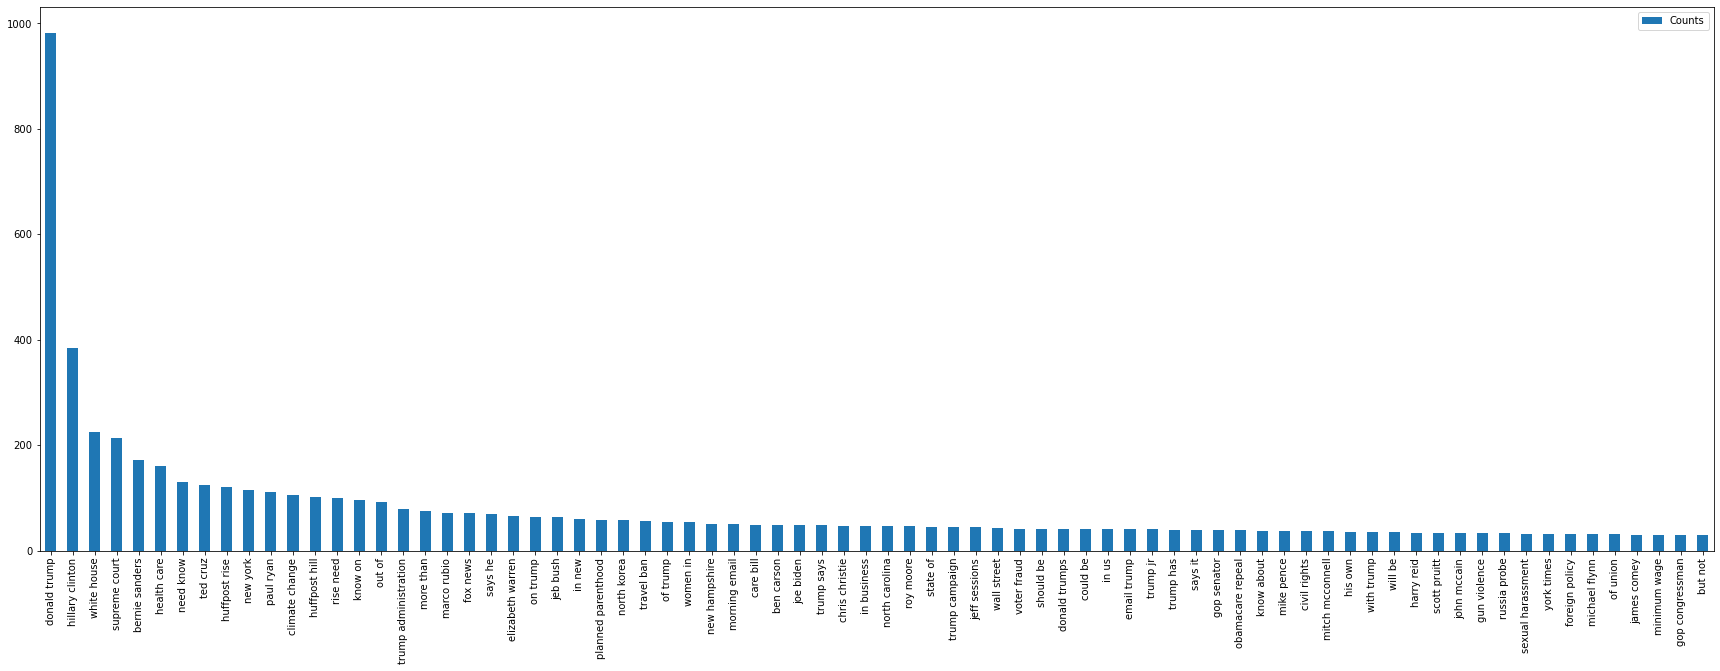

In [122]:
words_appearence_cut.plot(kind="bar", figsize=(30,10))

Usuńmy jeszcze te frazy z X_train_count

*Aktualnie nasze frazy są indeksami w words_appearence więc nie mamy się do nich jak łatwo odwołać, zresetujmy więc index*

In [123]:
words_appearence.reset_index(inplace=True)

Teraz możemy usunąć frazy z X_train_count

In [124]:
words_appearence_dropped = words_appearence[words_appearence.Counts < count_border]

In [125]:
X_train_count.drop(words_appearence_dropped['index'], axis=1, inplace=True)

In [126]:
X_train_count

,ben carson,bernie sanders,but not,care bill,chris christie,civil rights,climate change,could be,donald trump,donald trumps,...,trump has,trump jr,trump says,voter fraud,wall street,white house,will be,with trump,women in,york times
0,0,0,0,0,0,0,0,0,5,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,0,0,5,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
781,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
782,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
783,0,1,1,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
X_train_count.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

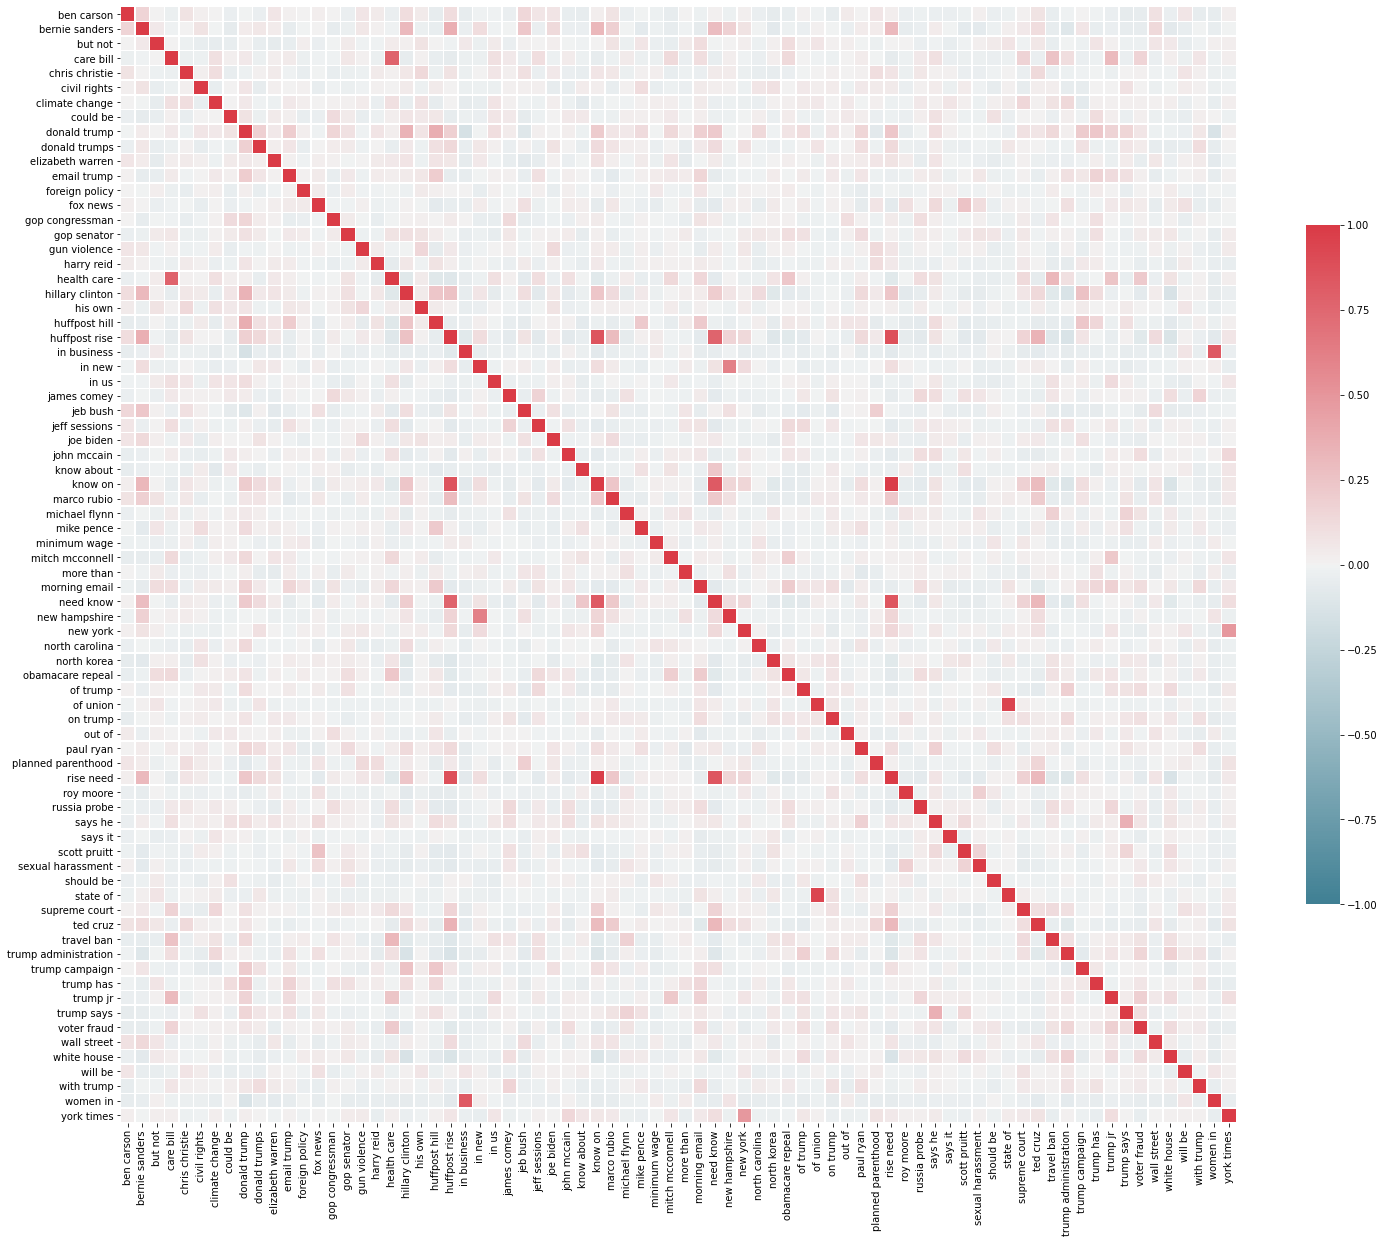

In [128]:
import seaborn as sns

# sns.set(style='darkgrid')

corr = X_train_count.corr()
f, ax = plt.subplots(figsize=(25, 25))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={'shrink': .5}, ax=ax)
plt.show()

# Przygotowanie zbioru testowego

**Najpierw stwórzmy tablicę fraz**

In [129]:
testheadlines = []
for row in range(0,len(X_test.index)):
    testheadlines.append(' '.join(str(x) for x in X_test.iloc[row]))

In [130]:
test_words = countvectorizer.fit_transform(testheadlines)
print(test_words.shape)

(197, 30114)


In [131]:
X_test_count_all = test_words.toarray()

In [132]:
X_test_count_all = pd.DataFrame(data=X_test_count_all,columns = countvectorizer.get_feature_names())

In [133]:
X_test_count_all.head()

,000 americans,000 brazilians,000 californians,000 campaign,000 dining,000 donation,000 fee,000 fighters,000 for,000 guns,...,zinke to,zionist new,zombie candidate,zones aim,zones clinic,zoos be,zucker defends,zuckerberg the,zuckerman eyes,zurich mosque
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
words_test = X_test_count_all.columns

In [135]:
words_test

Index(['000 americans', '000 brazilians', '000 californians', '000 campaign',
       '000 dining', '000 donation', '000 fee', '000 fighters', '000 for',
       '000 guns',
       ...
       'zinke to', 'zionist new', 'zombie candidate', 'zones aim',
       'zones clinic', 'zoos be', 'zucker defends', 'zuckerberg the',
       'zuckerman eyes', 'zurich mosque'],
      dtype='object', length=30114)

**Mamy już tablicę fraz oraz listę fraz**

Teraz musimy stworzyć X_test_count z takimi samymi kolumnami jak w X_train_count

In [136]:
X_test_count = pd.DataFrame(columns = X_train_count.columns)

In [137]:
X_test_count

,ben carson,bernie sanders,but not,care bill,chris christie,civil rights,climate change,could be,donald trump,donald trumps,...,trump has,trump jr,trump says,voter fraud,wall street,white house,will be,with trump,women in,york times


In [138]:
X_train_count.head(1)

,ben carson,bernie sanders,but not,care bill,chris christie,civil rights,climate change,could be,donald trump,donald trumps,...,trump has,trump jr,trump says,voter fraud,wall street,white house,will be,with trump,women in,york times
0,0,0,0,0,0,0,0,0,5,0,...,0,0,1,0,0,0,0,0,0,0


Utworzyliśmy pusty dataframe X_test_count zawierający kolumny z X_train_count

Teraz musimy wpisać wystąpienia fraz do X_test_count, jeśli w testheadlines nie było takiej frazy jaka była w X_train_count to wtedy wpisujemy 0

In [139]:
for col in X_test_count.columns:
    X_test_count[col] = X_test_count_all[col] if col in words_test else 0

In [140]:
X_test_count

,ben carson,bernie sanders,but not,care bill,chris christie,civil rights,climate change,could be,donald trump,donald trumps,...,trump has,trump jr,trump says,voter fraud,wall street,white house,will be,with trump,women in,york times
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,4,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
193,0,0,0,0,2,0,0,0,5,0,...,1,0,1,0,0,0,0,0,0,0
194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,1,0,0,0,0


Policzmy ile jest kolumn w których są same 0 (tak z ciekawości)

In [141]:
only_zeros_columns = []
for col in X_test_count.columns:
    if X_test_count[col].value_counts().size == 1:
        only_zeros_columns.append(col)

In [142]:
len(only_zeros_columns)

4

# Modele

In [143]:
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

seed=123
kfold = StratifiedKFold(n_splits=5)

COLUMNS = X_train_count.columns

X_train_count = X_train_count.values
X_test_count = X_test_count.values

## DecisionTreeClassifier 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

pipe = Pipeline([
    ('classifier', DecisionTreeClassifier())])
param_grid = {
            'classifier__criterion': ['gini', 'entropy', 'log_loss'],
            'classifier__splitter': ['best', 'random'],
            'classifier__min_samples_split':[1,2,4,10, 20, 50, 100],
            'classifier__min_samples_leaf':[1,2,4,10, 20, 50, 100]
}
grid_0 = GridSearchCV(pipe, param_grid, cv=kfold, verbose=10)
grid_0.fit(X_train_count, y_train)
grid_0.best_params_

In [145]:
grid_0.best_params_

{'classifier__criterion': 'gini',
 'classifier__min_samples_leaf': 50,
 'classifier__min_samples_split': 20,
 'classifier__splitter': 'random'}

## SVM (linear)

In [146]:
pipe = Pipeline([
    ('classifier', SVC(kernel='linear'))])
param_grid = {
            'classifier__C': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
}
grid_1 = GridSearchCV(pipe, param_grid, cv=kfold)
grid_1.fit(X_train_count, y_train)
grid_1.best_params_

{'classifier__C': 0.1}

In [147]:
grid_1.best_params_

{'classifier__C': 0.1}

## LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
pipe = Pipeline([
    ('classifier', LogisticRegression(max_iter=10000))])

param_grid = {
            'classifier__C' : np.linspace(0, 0.1, 100),
            'classifier__solver':['newton-cg', 'lbfgs', 'liblinear'],
            'classifier__penalty' : ['l1', 'l2'],
            'classifier__tol':[1e-5, 1e-4, 1e-3],
            'classifier__fit_intercept':[False, True]
}

grid_2 = GridSearchCV(pipe, param_grid, cv=kfold,scoring='accuracy')
grid_2.fit(X_train_count, y_train)
grid_2.best_params_

In [149]:
grid_2.best_params_

{'classifier__C': 0.00404040404040404,
 'classifier__fit_intercept': True,
 'classifier__penalty': 'l2',
 'classifier__solver': 'newton-cg',
 'classifier__tol': 1e-05}

## XGBClassifier 

In [150]:
import xgboost

xgb_cls = xgboost.XGBClassifier(n_estimators=10, verbosity = 0, use_label_encoder=False)

pipe = Pipeline([
    ('classifier', xgb_cls)])

param_grid = {
        'classifier__min_child_weight': [3,4,5],
        'classifier__gamma': [0, 1, 10],
        'classifier__subsample': [0.1, 0.3, 0.5],
        'classifier__lambda': [0.1, 1, 10, 100],
        'classifier__alpha': [0, 1, 10, 100],
        'classifier__max_depth': [3,6,9],
        'classifier__eta':[0.001, 0.01, 0.1, 0.3, 1],
}
# grid_3 = GridSearchCV(pipe, param_grid, cv=kfold, verbose=10, scoring='accuracy')
grid_3 = GridSearchCV(pipe, param_grid, cv=kfold, scoring='accuracy')
grid_3.fit(X_train_count, y_train)
grid_3.best_params_

{'classifier__alpha': 1,
 'classifier__eta': 0.001,
 'classifier__gamma': 0,
 'classifier__lambda': 0.1,
 'classifier__max_depth': 6,
 'classifier__min_child_weight': 4,
 'classifier__subsample': 0.5}

## RandomForestClassifier 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([
    ('classifier', RandomForestClassifier())])
param_grid = {
            'classifier__criterion': ['gini', 'entropy', 'log_loss'],
            'classifier__n_estimators': [10,100,400],
            'classifier__min_samples_split':[2,4,10, 20, 50, 100],
            'classifier__min_samples_leaf':[1,2,4,10, 20, 50, 100]
}
grid_4 = GridSearchCV(pipe, param_grid, cv=kfold)
grid_4.fit(X_train_count, y_train)
grid_4.best_params_

In [152]:
grid_4.best_params_

{'classifier__criterion': 'entropy',
 'classifier__min_samples_leaf': 20,
 'classifier__min_samples_split': 20,
 'classifier__n_estimators': 400}

## MLPClassifier 

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(alpha=1e-5, max_iter=100,random_state=1)

pipe = Pipeline([
    ('classifier', mlp)])

param_grid = {
              'classifier__solver':['sgd', 'adam'],
#               'classifier__alpha': [0.0001, 0.001, 0.01, 0.1],
                'classifier__alpha': [0.001, 0.01, 0.1],
              'classifier__activation':['identity', 'logistic', 'relu'],
              'classifier__shuffle': [False, True],
              'classifier__early_stopping': [False, True],
              'classifier__hidden_layer_sizes':[(100,)],
              'classifier__learning_rate':['invscaling', 'adaptive'],
              'classifier__batch_size':[50, 100, 200, 300]
             }

grid_5 = GridSearchCV(pipe, param_grid, cv=kfold,scoring='accuracy')
# grid_5 = mlp
grid_5.fit(X_train_count, y_train)
grid_5.best_params_

In [154]:
grid_5.best_params_

{'classifier__activation': 'logistic',
 'classifier__alpha': 0.1,
 'classifier__batch_size': 50,
 'classifier__early_stopping': True,
 'classifier__hidden_layer_sizes': (100,),
 'classifier__learning_rate': 'invscaling',
 'classifier__shuffle': False,
 'classifier__solver': 'adam'}

## GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
pipe = Pipeline([
    ('classifier', GradientBoostingClassifier())])

param_grid = {
            'classifier__n_estimators': [1,10,30, 60],
            'classifier__learning_rate': [0.01, 0.1, 0.3, 0.6, 0.8, 1],
            'classifier__criterion': ['friedman_mse', 'squared_error'],
            'classifier__min_samples_split':[2,4,10, 20, 50, 100],
            'classifier__min_samples_leaf':[1,2,4,10, 20, 50, 100]
}

grid_6 = GridSearchCV(pipe, param_grid, cv=kfold, scoring='accuracy')
grid_6.fit(X_train_count, y_train)
grid_6.best_params_

In [156]:
grid_6.best_params_

{'classifier__criterion': 'friedman_mse',
 'classifier__learning_rate': 0.3,
 'classifier__min_samples_leaf': 4,
 'classifier__min_samples_split': 2,
 'classifier__n_estimators': 10}

## AdaBoostClassifier 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
pipe = Pipeline([
    ('classifier', AdaBoostClassifier())])

param_grid = {
            'classifier__n_estimators': [1,10,30,40,50,60,70],
            'classifier__learning_rate': [0.001, 0.01, 0.1,0.3, 0.6, 0.8, 1,2,4,6, 10],
            'classifier__algorithm': ['SAMME', 'SAMME.R']
}

grid_7 = GridSearchCV(pipe, param_grid, cv=kfold, scoring='accuracy')
grid_7.fit(X_train_count, y_train)
grid_7.best_params_

In [158]:
grid_7.best_params_

{'classifier__algorithm': 'SAMME.R',
 'classifier__learning_rate': 0.3,
 'classifier__n_estimators': 30}

## Keras bez early stopping 

In [159]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

from tensorflow.keras.callbacks import History

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout

keras.backend.clear_session()

history_1 = History()
keras_1 = Sequential()

keras_1.add(Flatten(input_shape=((X_train_count).shape[1],)))

keras_1.add(Dense(300))
keras_1.add(BatchNormalization())
keras_1.add(Activation("elu"))
keras_1.add(Dropout(0.3))

keras_1.add(Dense(150))
keras_1.add(BatchNormalization())
keras_1.add(Activation("elu"))
keras_1.add(Dropout(0.3))

keras_1.add(Dense(50))
keras_1.add(BatchNormalization())
keras_1.add(Activation("elu"))
keras_1.add(Dropout(0.3))

keras_1.add(Dense(1,activation="sigmoid"))

keras_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 76)                0         
_________________________________________________________________
dense (Dense)                (None, 300)               23100     
_________________________________________________________________
batch_normalization (BatchNo (None, 300)               1200      
_________________________________________________________________
activation (Activation)      (None, 300)               0         
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               45150     
_________________________________________________________________
batch_normalization_1 (Batch (None, 150)               6

In [160]:
keras_1.compile(loss="binary_crossentropy",optimizer='adam', metrics=["accuracy"])

In [161]:
keras_1.fit(X_train_count, y_train,validation_data=(X_test_count, y_test), batch_size=32,epochs=200, callbacks=[history_1])

Epoch 1/200
25/25 [==============================] - 0s 11ms/step - loss: 0.8232 - accuracy: 0.5223 - val_loss: 0.6746 - val_accuracy: 0.5888
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 0.7547 - accuracy: 0.5389 - val_loss: 0.6656 - val_accuracy: 0.6142
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 0.7252 - accuracy: 0.5427 - val_loss: 0.6649 - val_accuracy: 0.6345
Epoch 4/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6978 - accuracy: 0.5924 - val_loss: 0.6622 - val_accuracy: 0.6294
Epoch 5/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6978 - accuracy: 0.5682 - val_loss: 0.6636 - val_accuracy: 0.6091
Epoch 6/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6780 - accuracy: 0.5898 - val_loss: 0.6583 - val_accuracy: 0.6142
Epoch 7/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6761 - accuracy: 0.6025 - val_loss: 0.6670 - val_accuracy: 0.5990
Epoch 8/200


Epoch 59/200
25/25 [==============================] - 0s 3ms/step - loss: 0.3928 - accuracy: 0.8089 - val_loss: 1.0092 - val_accuracy: 0.5787
Epoch 60/200
25/25 [==============================] - 0s 3ms/step - loss: 0.4005 - accuracy: 0.8000 - val_loss: 0.9805 - val_accuracy: 0.5584
Epoch 61/200
25/25 [==============================] - 0s 3ms/step - loss: 0.3722 - accuracy: 0.8178 - val_loss: 1.0243 - val_accuracy: 0.5584
Epoch 62/200
25/25 [==============================] - 0s 3ms/step - loss: 0.3967 - accuracy: 0.8153 - val_loss: 1.0121 - val_accuracy: 0.5685
Epoch 63/200
25/25 [==============================] - 0s 3ms/step - loss: 0.3841 - accuracy: 0.8217 - val_loss: 1.0273 - val_accuracy: 0.5787
Epoch 64/200
25/25 [==============================] - 0s 3ms/step - loss: 0.4282 - accuracy: 0.7962 - val_loss: 1.0863 - val_accuracy: 0.5279
Epoch 65/200
25/25 [==============================] - 0s 3ms/step - loss: 0.3535 - accuracy: 0.8293 - val_loss: 1.0109 - val_accuracy: 0.5787
Epoch 

25/25 [==============================] - 0s 3ms/step - loss: 0.2176 - accuracy: 0.8930 - val_loss: 1.6661 - val_accuracy: 0.5431
Epoch 174/200
25/25 [==============================] - 0s 3ms/step - loss: 0.2320 - accuracy: 0.8943 - val_loss: 1.7471 - val_accuracy: 0.5533
Epoch 175/200
25/25 [==============================] - 0s 3ms/step - loss: 0.2397 - accuracy: 0.8904 - val_loss: 1.6881 - val_accuracy: 0.5533
Epoch 176/200
25/25 [==============================] - 0s 3ms/step - loss: 0.2320 - accuracy: 0.9070 - val_loss: 1.6871 - val_accuracy: 0.5685
Epoch 177/200
25/25 [==============================] - 0s 3ms/step - loss: 0.2396 - accuracy: 0.8917 - val_loss: 1.6107 - val_accuracy: 0.5635
Epoch 178/200
25/25 [==============================] - 0s 3ms/step - loss: 0.2138 - accuracy: 0.8955 - val_loss: 1.6198 - val_accuracy: 0.5482
Epoch 179/200
25/25 [==============================] - 0s 3ms/step - loss: 0.1934 - accuracy: 0.9032 - val_loss: 1.6498 - val_accuracy: 0.5584
Epoch 180/200

## Keras z early stopping

In [162]:
keras.backend.clear_session()

history_2 = History()
keras_2 = Sequential()

keras_2.add(Flatten(input_shape=((X_train_count).shape[1],)))

keras_2.add(Dense(300))
keras_2.add(BatchNormalization())
keras_2.add(Activation("elu"))
keras_2.add(Dropout(0.3))

keras_2.add(Dense(150))
keras_2.add(BatchNormalization())
keras_2.add(Activation("elu"))
keras_2.add(Dropout(0.3))

keras_2.add(Dense(50))
keras_2.add(BatchNormalization())
keras_2.add(Activation("elu"))
keras_2.add(Dropout(0.3))

keras_2.add(Dense(1,activation="sigmoid"))

keras_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 76)                0         
_________________________________________________________________
dense (Dense)                (None, 300)               23100     
_________________________________________________________________
batch_normalization (BatchNo (None, 300)               1200      
_________________________________________________________________
activation (Activation)      (None, 300)               0         
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               45150     
_________________________________________________________________
batch_normalization_1 (Batch (None, 150)               6

In [163]:
keras_2.compile(loss="binary_crossentropy",optimizer='adam', metrics=["accuracy"])

In [164]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', verbose=1)

In [165]:
keras_2.fit(X_train_count, y_train,validation_data=(X_test_count, y_test), batch_size=32,epochs=200, callbacks=[history_2,early_stopping])

Epoch 1/200
25/25 [==============================] - 0s 9ms/step - loss: 0.8676 - accuracy: 0.5096 - val_loss: 0.6925 - val_accuracy: 0.5584
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 0.7867 - accuracy: 0.5248 - val_loss: 0.6656 - val_accuracy: 0.5990
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 0.7167 - accuracy: 0.5694 - val_loss: 0.6567 - val_accuracy: 0.5939
Epoch 4/200
25/25 [==============================] - 0s 3ms/step - loss: 0.7063 - accuracy: 0.5656 - val_loss: 0.6624 - val_accuracy: 0.6041
Epoch 5/200
25/25 [==============================] - 0s 3ms/step - loss: 0.7034 - accuracy: 0.5936 - val_loss: 0.6685 - val_accuracy: 0.5736
Epoch 6/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.5682 - val_loss: 0.6760 - val_accuracy: 0.5482
Epoch 7/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6749 - accuracy: 0.6051 - val_loss: 0.6755 - val_accuracy: 0.5635
Epoch 8/200
2

# Wyniki

Po kolei sprawdzamy accuracy dla każdego modelu oraz dodajemy niekiedy dodatkowe rzeczy w postaci np. wykresów.

**Na samym dole w tabelce zebraliśmy wszystkie wyniki razem**

In [166]:
from sklearn import  metrics

In [185]:
#DecisionTreeClassifier
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, grid_0.predict(X_test_count)) ))

accuracy_score: 0.5076142131979695


Generowanie drzewa (wizualizacja)

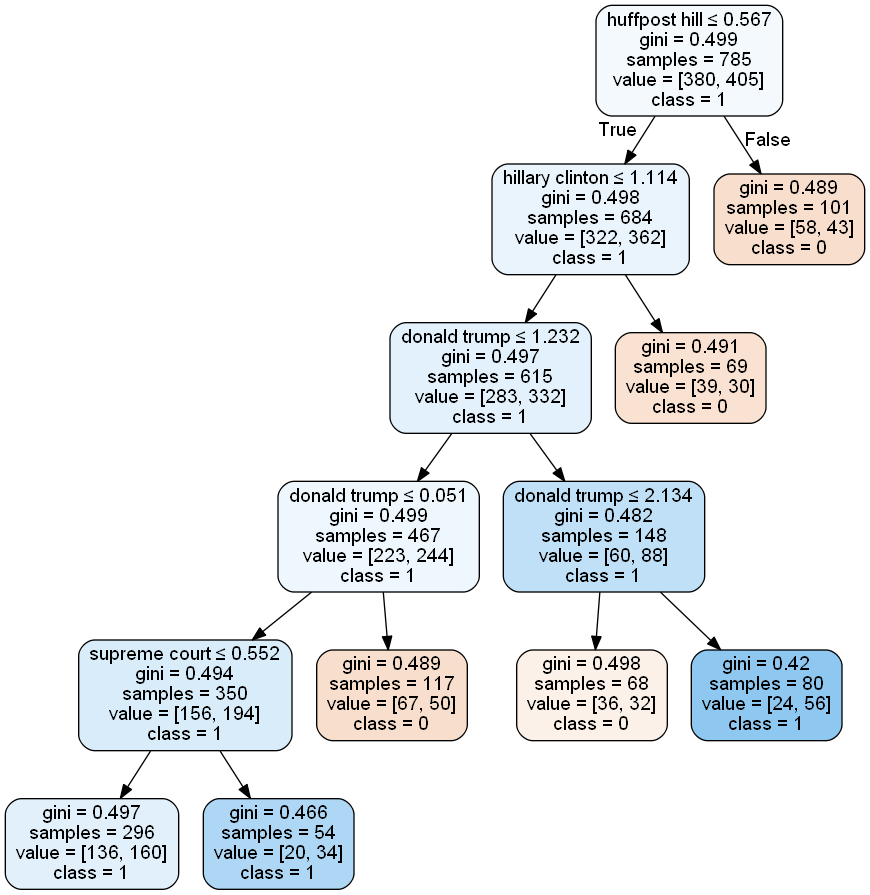

In [168]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

model = grid_0.best_estimator_.named_steps['classifier']
dot_data = StringIO()
export_graphviz(
    model,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=COLUMNS,
    class_names=['0', '1']
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())

In [169]:
#SVM
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, grid_1.predict(X_test_count)) ))

accuracy_score: 0.5736040609137056


In [170]:
#Logistic regression
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, grid_2.predict(X_test_count)) ))

accuracy_score: 0.6091370558375635


In [171]:
#XGBoost
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, grid_3.predict(X_test_count)) ))

accuracy_score: 0.5532994923857868


In [172]:
#RandomForestClassifier
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, grid_4.predict(X_test_count)) ))

accuracy_score: 0.5228426395939086


In [173]:
#MLP
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, grid_5.predict(X_test_count)) ))

accuracy_score: 0.6091370558375635


In [174]:
#GradientBoostingClassifeir
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, grid_6.predict(X_test_count)) ))

accuracy_score: 0.5126903553299492


In [175]:
#AdaBoostingClassifeir
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, grid_7.predict(X_test_count)) ))

accuracy_score: 0.49746192893401014


In [176]:
#Keras bez early stopping
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, keras_1.predict_classes(X_test_count)) ))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
accuracy_score: 0.5380710659898477


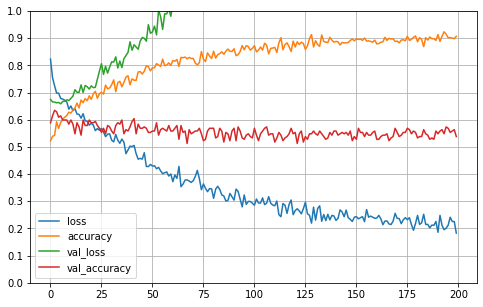

In [177]:
import pandas as pd

pd.DataFrame(history_1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.yticks(np.linspace(0,1,11))
plt.show()

In [178]:
#Keras z early stopping
print("accuracy_score: {}".format( metrics.accuracy_score(y_test, keras_2.predict_classes(X_test_count)) ))

accuracy_score: 0.5736040609137056


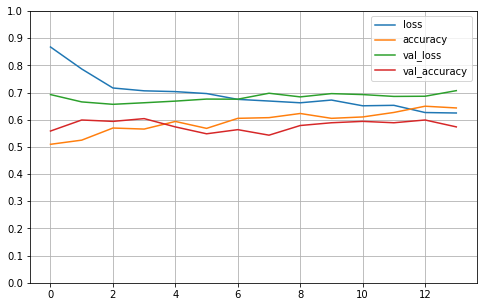

In [179]:
pd.DataFrame(history_2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.yticks(np.linspace(0,1,11))
plt.show()

## Zwizualizujmy wyniki w tabelce 

Instructions for updating:
Please use `model.predict()` instead.


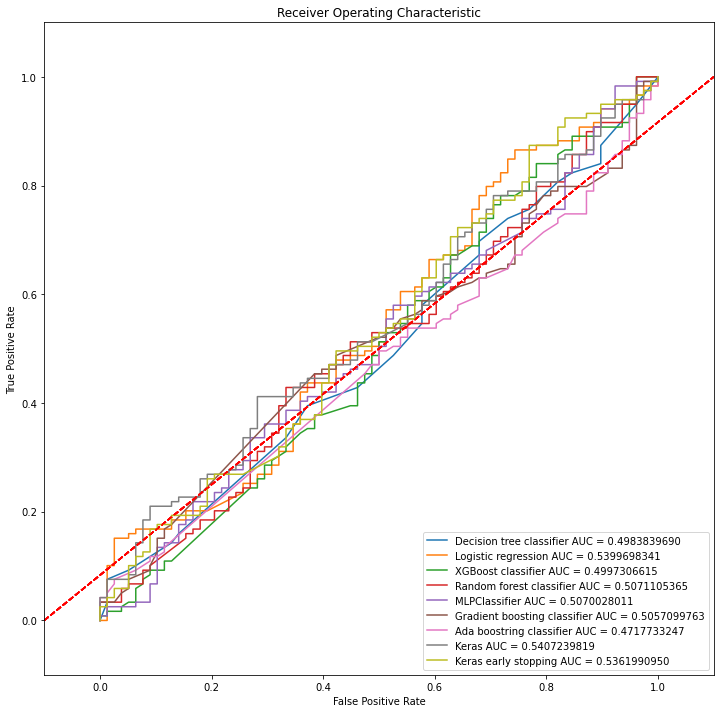

In [188]:
models = []
models.append(('Decision tree classifier', grid_0))
models.append(('SVM linear', grid_1))
models.append(('Logistic regression', grid_2))
models.append(('XGBoost classifier', grid_3))
models.append(('Random forest classifier', grid_4))
models.append(('MLPClassifier', grid_5))
models.append(('Gradient boosting classifier', grid_6))
models.append(('Ada boostring classifier', grid_7))
models.append(('Keras', keras_1))
models.append(('Keras early stopping', keras_2))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_val = []
plt.figure(figsize=(12, 12))
for name, model in models:
    if((name == 'Keras') or (name == 'Keras early stopping')):
        precision_score.append(metrics.precision_score(y_test, model.predict_classes(X_test_count)))
        recall_score.append(metrics.recall_score(y_test, model.predict_classes(X_test_count)))
        f1_score.append( metrics.f1_score(y_test, model.predict_classes(X_test_count)))
        accuracy_score.append(metrics.accuracy_score(y_test, model.predict_classes(X_test_count)))
        
        
        # calculate the fpr and tpr for all thresholds of the classification
        probs = model.predict_proba(X_test_count)
        preds = probs
        fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
        roc_auc = metrics.auc(fpr, tpr)
        roc_auc_val.append(roc_auc)
        
    else:
        precision_score.append(metrics.precision_score(y_test, model.predict(X_test_count)))
        recall_score.append(metrics.recall_score(y_test, model.predict(X_test_count)))
        f1_score.append( metrics.f1_score(y_test, model.predict(X_test_count)))
        accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test_count)))
        
        if (name != 'SVM linear'):
            # calculate the fpr and tpr for all thresholds of the classification
            probs = model.predict_proba(X_test_count)
            preds = probs[:,1]
            fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
            roc_auc = metrics.auc(fpr, tpr)
            roc_auc_val.append(roc_auc)
            
            
    if (name != 'SVM linear'):
        # method I: plt
        import matplotlib.pyplot as plt
        plt.title('Receiver Operating Characteristic')
        plt.plot(fpr, tpr, label = '%s AUC = %0.10f' % (name, roc_auc))
        plt.legend(loc = 'lower right')
        plt.plot([-0.1, 1.1], [0, 1],'r--')
        plt.xlim([-0.1, 1.1])
        plt.ylim([-0.1, 1.1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
plt.rcParams['figure.figsize'] = [2, 2]
plt.show()

In [190]:
d = {
     'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
#      'roc_auc': roc_auc_val
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=[model[0] for model in models])
df.sort_values(by='accuracy_score', ascending=False)

,Method,precision_score,recall_score,f1_score,accuracy_score
2,Logistic regression,0.626506,0.873950,0.729825,0.609137
5,MLPClassifier,0.608247,0.991597,0.753994,0.609137
1,SVM linear,0.625899,0.731092,0.674419,0.573604
9,Keras early stopping,0.617450,0.773109,0.686567,0.573604
3,XGBoost classifier,0.613139,0.705882,0.656250,0.553299
8,Keras,0.612903,0.638655,0.625514,0.538071
4,Random forest classifier,0.592593,0.672269,0.629921,0.522843
6,Gradient boosting classifier,0.598291,0.588235,0.593220,0.512690
0,Decision tree classifier,0.598214,0.563025,0.580087,0.507614
7,Ada boostring classifier,0.574627,0.647059,0.608696,0.497462


In [191]:
data['Increased'].value_counts()

1    524
0    458
Name: Increased, dtype: int64

In [192]:
524/(458+524)

0.5336048879837068